## ANLP Assignment 1: Sentiment Analysis
### Christopher Hamilton,  a1766121

In [1]:
import json
import os 

import pandas as pd
import numpy as np
from langdetect import detect as detect_language

### 1. Reading dataset and initial pre-processing

In [2]:
def read_json_to_df(file_name):
    data = []
    with open(file_name) as data_file:
        for line in data_file:
            data.append(json.loads(line))    

    return pd.json_normalize(data)

train_df = read_json_to_df("hotel_reviews_train.json")
test_df = read_json_to_df("hotel_reviews_test.json")

In [3]:
train_df.head()

title  \
0                       “Horrible experience”   
1                                 “Stay Away”   
2                “Great location and service”   
3          “I will never go back here again!”   
4  “Ripped off our VISA card after departure”   

                                                text     date_stayed  \
0  First of all we got there and they didn't have...  September 2012   
1  Found Racist graffiti in the room. Request to ...       June 2011   
2  Close to Union Square - hotel is a bit of a ma...    October 2010   
3  I had a bad vibe about this place from the mom...       June 2012   
4  After we received our "final" bill and left th...    January 2012   

   offering_id  num_helpful_votes                date         id  via_mobile  \
0        80138                  0  September 19, 2012  140716137       False   
1       240151                  1       June 27, 2011  114807323       False   
2        80793                  0    October 25, 2010   84805430       False   
3       111418                  1       June 28, 2012  132971117       False   
4       671150                  3    February 4, 2012  124104157       False   

   ratings.service  ratings.cleanliness  ...  ratings.rooms  \
0              1.0                  2.0  ...            1.0   
1              1.0                  1.0  ...            NaN   
2              4.0                  5.0  ...            4.0   
3              3.0                  2.0  ...            1.0   
4              NaN                  NaN  ...            NaN   

       author.username  author.num_reviews                         author.id  \
0                Kh3RD                 1.0  AB404BB664D653ECF79DE0E0867F6D34   
1  TheUglyPhotographer                 4.0  BB116F87FE8F9AB356F63853BFD32FFE   
2     Moonstonemoclips                48.0  F3D0CF371B788300E73A1413B2DABB4B   
3           JoanellenJ                22.0  BC6BC07F81B768F78B6CE17A18762C11   
4            Lynnworks                 3.0  F7E9D044FA2554FD06A871289312E043   

         author.location author.num_cities  author.num_helpful_votes  \
0      Las Vegas, Nevada               NaN                       NaN   
1  Oceanside, California               3.0                       4.0   
2               Kirkland              31.0                      27.0   
3               New York              10.0                       9.0   
4             Providence               3.0                       7.0   

  author.num_type_reviews ratings.check_in_front_desk  \
0                     NaN                         NaN   
1                     4.0                         NaN   
2                    32.0                         NaN   
3                     5.0                         NaN   
4                     3.0                         NaN   

   ratings.business_service_(e_g_internet_access)  
0                                             NaN  
1                                             NaN  
2                                             NaN  
3                                             NaN  
4                                             NaN  

[5 rows x 24 columns]

In [4]:
test_df.head()

title  \
0              “I was SO surprised! I WILL return!”   
1                      “A Mother/Daughter vacation”   
2                      “Good Choice for Pre-cruise”   
3                                     “Unsung Hero”   
4  “Great Value for a King, Queen, and Princesses.”   

                                                text    date_stayed  \
0  My husband and I just celebrated our 25th wedd...  November 2011   
1  I could not leave a bad comment on any part of...    August 2011   
2  I spent one night at this hotel prior to a cru...  November 2010   
3  For the past year and a half, my daughter has ...      July 2011   
4  Great Value for a King, Queen, and Princesses....     March 2007   

   offering_id  num_helpful_votes               date         id  via_mobile  \
0      1783324                  1  November 26, 2011  121063682       False   
1        88458                  0    August 10, 2011  116545869       False   
2        82868                  0   December 6, 2010   89196759       False   
3        98979                  0      July 28, 2011  115879719       False   
4       112273                  8     March 21, 2007    7198417       False   

   ratings.service  ratings.cleanliness  ...  ratings.rooms  author.username  \
0              5.0                  5.0  ...            5.0      shooflyfarm   
1              5.0                  5.0  ...            NaN          bestmpm   
2              5.0                  5.0  ...            5.0      Conner2dood   
3              5.0                  5.0  ...            NaN            LeviK   
4              5.0                  5.0  ...            5.0          thomrho   

   author.num_cities  author.num_helpful_votes  author.num_reviews  \
0               15.0                      12.0                30.0   
1                NaN                       NaN                 1.0   
2               20.0                      39.0                26.0   
3                2.0                       NaN                 2.0   
4               13.0                      25.0                27.0   

  author.num_type_reviews                         author.id   author.location  \
0                    11.0  02C39D355EE31BFA82F2724523782A92  Opelika, Alabama   
1                     NaN  8F37B44FE89FD626313A7CB4B381FE40       Chattanooga   
2                    24.0  5E57B2B21C69F07E617D67C748DF010A      Pennsylvania   
3                     NaN  D7E5C22B3A877DEA1434B18E797FEE19                     
4                     4.0  EEE6C615C8EBCA4AFD2774810E590274   albuquerque, nm   

   ratings.check_in_front_desk  ratings.business_service_(e_g_internet_access)  
0                          NaN                                             NaN  
1                          NaN                                             NaN  
2                          NaN                                             NaN  
3                          NaN                                             NaN  
4                          5.0                                             5.0  

[5 rows x 24 columns]

In [5]:
predict_overall_train_df = train_df[["title", "text", "ratings.overall"]]
predict_overall_test_df = test_df[["title", "text", "ratings.overall"]]

print(predict_overall_train_df["ratings.overall"].value_counts())
print(predict_overall_test_df["ratings.overall"].value_counts())

ratings.overall
5.0    9825
4.0    7720
3.0    3287
2.0    1611
1.0    1557
Name: count, dtype: int64
ratings.overall
5.0    2468
4.0    1933
3.0     793
2.0     420
1.0     385
0.0       1
Name: count, dtype: int64


In [6]:
# Remove the 0 rating from the test set
predict_overall_test_df = predict_overall_test_df[predict_overall_test_df["ratings.overall"] != 0]

In [7]:
predict_overall_train_df.loc[:,'title'] = ["".join(filter(lambda c: str.isalnum(c) or str.isspace(c), char)) for char in predict_overall_train_df.title]
predict_overall_train_df.loc[:,'text'] = ["".join(filter(lambda c: str.isalnum(c) or str.isspace(c), char)) for char in predict_overall_train_df.text]

predict_overall_test_df.loc[:,'title'] = ["".join(filter(lambda c: str.isalnum(c) or str.isspace(c), char)) for char in predict_overall_test_df.title]
predict_overall_test_df.loc[:,'text'] = ["".join(filter(lambda c: str.isalnum(c) or str.isspace(c), char)) for char in predict_overall_test_df.text]

In [8]:
predict_overall_train_df.head()

title  \
0                       Horrible experience   
1                                 Stay Away   
2                Great location and service   
3           I will never go back here again   
4  Ripped off our VISA card after departure   

                                                text  ratings.overall  
0  First of all we got there and they didnt have ...              1.0  
1  Found Racist graffiti in the room Request to c...              1.0  
2  Close to Union Square  hotel is a bit of a maz...              4.0  
3  I had a bad vibe about this place from the mom...              2.0  
4  After we received our final bill and left the ...              1.0

In [9]:
predict_overall_test_df.head()

title  \
0             I was SO surprised I WILL return   
1                    A MotherDaughter vacation   
2                    Good Choice for Precruise   
3                                  Unsung Hero   
4  Great Value for a King Queen and Princesses   

                                                text  ratings.overall  
0  My husband and I just celebrated our 25th wedd...              5.0  
1  I could not leave a bad comment on any part of...              5.0  
2  I spent one night at this hotel prior to a cru...              4.0  
3  For the past year and a half my daughter has b...              5.0  
4  Great Value for a King Queen and Princesses We...              5.0

In [10]:
def filter_english_reviews(df):
    def is_english(text):
        try:
            return detect_language(text) == "en"
        except:
            return False

    return df[df['text'].apply(is_english) & df['title'].apply(is_english)]

In [11]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

# Save the English reviews to a CSV file to save time filtering when running again
if os.path.exists("english_hotel_reviews_train.csv"):
    predict_overall_train_df = pd.read_csv("english_hotel_reviews_train.csv")
else:
    predict_overall_train_df = filter_english_reviews(predict_overall_train_df)
    predict_overall_train_df.to_csv("english_hotel_reviews_train.csv", index=False)

if os.path.exists("english_hotel_reviews_test.csv"):
    predict_overall_test_df = pd.read_csv("english_hotel_reviews_test.csv")
else:
    predict_overall_test_df = filter_english_reviews(predict_overall_test_df)
    predict_overall_test_df.to_csv("english_hotel_reviews_test.csv", index=False)

In [12]:
print(train_df.info())
print(predict_overall_train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   title                                           24000 non-null  object 
 1   text                                            24000 non-null  object 
 2   date_stayed                                     23050 non-null  object 
 3   offering_id                                     24000 non-null  int64  
 4   num_helpful_votes                               24000 non-null  int64  
 5   date                                            24000 non-null  object 
 6   id                                              24000 non-null  int64  
 7   via_mobile                                      24000 non-null  bool   
 8   ratings.service                                 21550 non-null  float64
 9   ratings.cleanliness                    

In [13]:
print(test_df.info())
print(predict_overall_test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   title                                           6000 non-null   object 
 1   text                                            6000 non-null   object 
 2   date_stayed                                     5756 non-null   object 
 3   offering_id                                     6000 non-null   int64  
 4   num_helpful_votes                               6000 non-null   int64  
 5   date                                            6000 non-null   object 
 6   id                                              6000 non-null   int64  
 7   via_mobile                                      6000 non-null   bool   
 8   ratings.service                                 5351 non-null   float64
 9   ratings.cleanliness                      

### 2. Exploratory Data Analysis (EDA)

In [14]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /home/dev/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

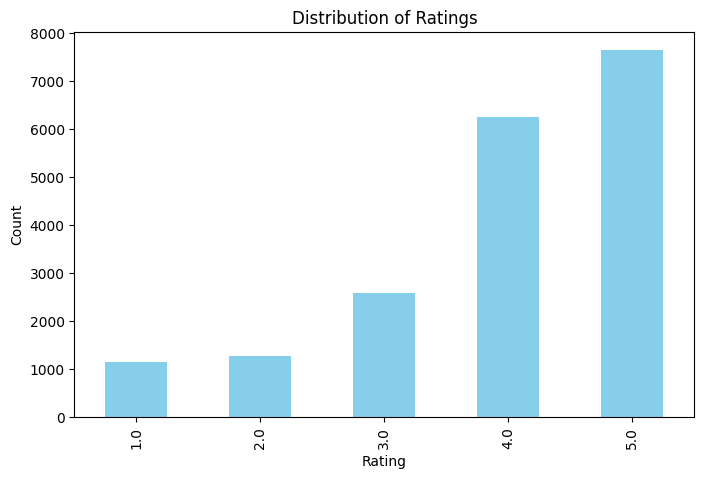

In [15]:
import matplotlib.pyplot as plt

# Plot distribution of ratings
predict_overall_train_df['ratings.overall'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), color='skyblue')

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

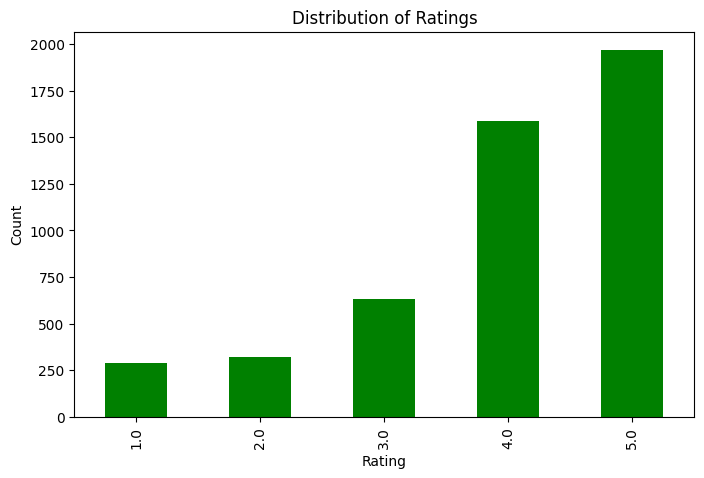

In [16]:
import matplotlib.pyplot as plt

# Plot distribution of ratings
predict_overall_test_df['ratings.overall'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), color='green')

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)  # Remove common words
tf_idf_train = vectorizer.fit_transform(train_df["text"])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tf_idf_train.toarray(), columns=vectorizer.get_feature_names_out())

correlations = tfidf_df.corrwith(train_df["ratings.overall"])
correlations = correlations.sort_values(ascending=False)  # Sort by importance

# Find words with the weakest correlation (near zero)
non_predictive_words = correlations.sort_values(key=lambda x: np.abs(x))
print("Non-Predictive Words:\n", non_predictive_words.head(10))

# Display top positive and negative correlated words
print("Most Positive Words:\n", correlations.head(10))
print("\nMost Negative Words:\n", correlations.tail(10))

Non-Predictive Words:
 jane         0.000003
familiar     0.000005
teenagers    0.000028
39          -0.000029
extend      -0.000033
couches      0.000035
doughnuts   -0.000042
bldg        -0.000043
queue        0.000045
keeping      0.000047
dtype: float64
Most Positive Words:
 great          0.251586
staff          0.196470
friendly       0.167828
comfortable    0.159558
helpful        0.156769
wonderful      0.153227
excellent      0.148437
perfect        0.147401
highly         0.132126
loved          0.126517
dtype: float64

Most Negative Words:
 carpet     -0.153744
bad        -0.155436
room       -0.156964
horrible   -0.164654
terrible   -0.168106
rude       -0.182339
said       -0.185605
worst      -0.212137
dirty      -0.233399
told       -0.250588
dtype: float64


In [18]:
# Split all reviews into words and find unique ones
all_words_text = predict_overall_train_df.text.apply(nltk.word_tokenize)
all_words_title = predict_overall_train_df.title.apply(nltk.word_tokenize)

all_words = pd.concat([all_words_text, all_words_title])
unique_words = np.unique(all_words)

print("Total Unique Words:", len(unique_words))


Total Unique Words: 35245


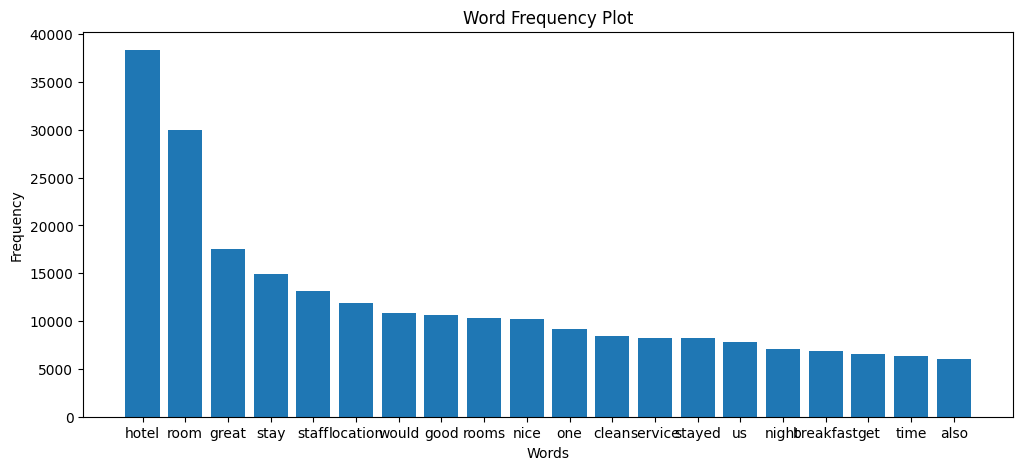

In [19]:
# Word frequency plots are used to visualize the most common words in a dataset.

from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

tokens = [
    word.lower() for sentence in unique_words.tolist()
    for s in sentence
    for word in word_tokenize(s)
    if word.isalnum() and word.lower() not in stop_words
]

word_freq = Counter(tokens)

plt.figure(figsize=(12, 5))
plt.bar(*zip(*word_freq.most_common(20)))
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Plot")
plt.show()


Distribution of 3-grams:
within walking distance: 777
front desk staff: 690
hotel great location: 587
staff friendly helpful: 576
would definitely stay: 544
would recommend hotel: 311
great place stay: 304
empire state building: 289
flat screen tv: 285
stayed one night: 264
would highly recommend: 258
highly recommend hotel: 252
new york city: 246
great location great: 231
called front desk: 212
right across street: 204
recommend hotel anyone: 190
hotel good location: 179
would definitely recommend: 177
easy walking distance: 159
great hotel great: 152
stayed 3 nights: 152
hotel staff friendly: 140
king size bed: 137
stayed two nights: 132
walk times square: 129
staff great location: 129
right next door: 127
location great hotel: 126
room clean comfortable: 125
stayed 4 nights: 122
front desk clerk: 121
really enjoyed stay: 119
friendly helpful staff: 118
stayed 2 nights: 117
made us feel: 115
staff helpful friendly: 112
clean staff friendly: 109
good value money: 109
two double beds: 

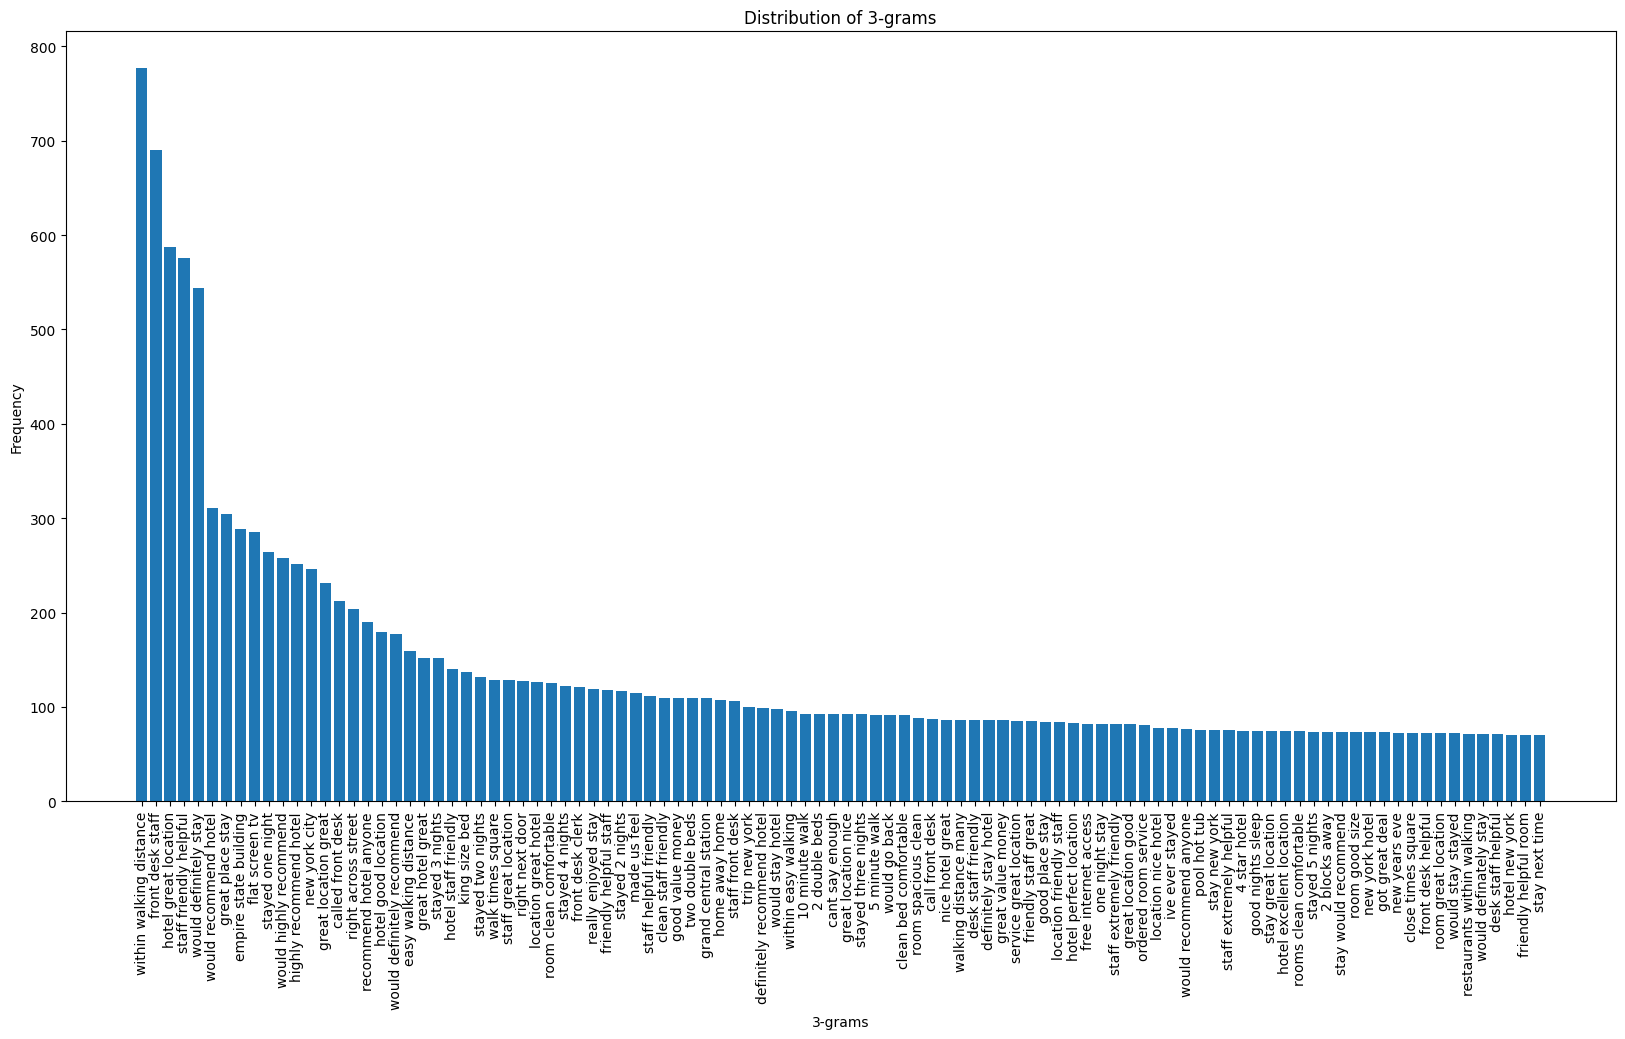

In [20]:
# Identifying common N-grams: N-grams are sequences of words. 
# Identifying common n-grams can give insight into the most common phrases in the dataset.

from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt

# Function to generate n-grams
def generate_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(gram) for gram in n_grams]

# Specify the value of n for n-grams
n_value = 3  # You can change this value to see different n-grams, e.g., 2 for bigrams, 3 for trigrams, etc.

# Generate n-grams
ngrams_list = generate_ngrams(tokens, n_value)

# Count the occurrences of each n-gram
ngrams_count = Counter(ngrams_list)
most_common_ngrams = ngrams_count.most_common(100)

# Display the distribution
print(f"Distribution of {n_value}-grams:")
for ngram, count in most_common_ngrams:
    print(f"{ngram}: {count}")

# Plot the distribution
labels, values = zip(*most_common_ngrams)
indexes = range(len(labels))

plt.figure(figsize=(20, 10))
plt.bar(indexes, values)
plt.xlabel(f'{n_value}-grams')
plt.ylabel('Frequency')
plt.xticks(indexes, labels, rotation='vertical')
plt.title(f'Distribution of {n_value}-grams')
plt.show()

### 3. Selection and training Machine Learning models

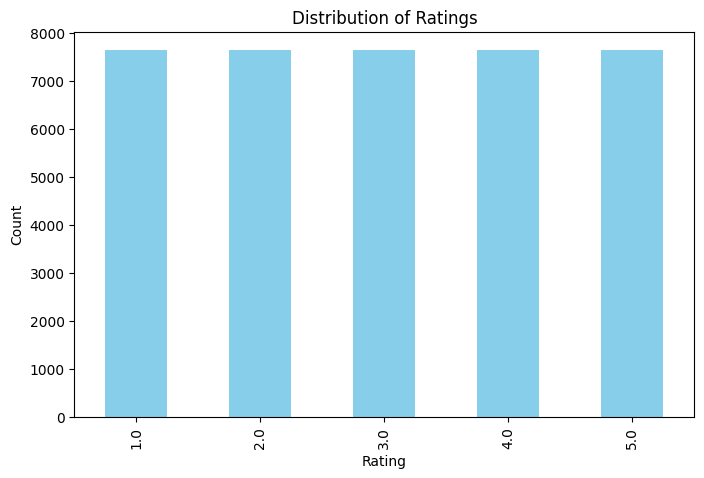

In [21]:
# Balance the training data by oversampling
def balance_data_oversample(df):
    max_count = df['ratings.overall'].value_counts().max()
    balanced_df = pd.DataFrame()

    for rating in df['ratings.overall'].unique():
        rating_df = df[df['ratings.overall'] == rating]
        balanced_df = pd.concat([balanced_df, rating_df.sample(max_count, replace=True)])

    return balanced_df
balanced_train_df = balance_data_oversample(predict_overall_train_df)

# Plot distribution of ratings
balanced_train_df['ratings.overall'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), color='skyblue')

plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Ratings")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

X_res = pd.concat([balanced_train_df["title"], balanced_train_df["text"]], axis=1)
X_res = X_res["title"] + " " + X_res["text"]
y_res = balanced_train_df["ratings.overall"]

X_train, X_val, y_train, y_val = train_test_split(X_res, y_res, test_size=0.2, shuffle=True)


In [23]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_val_vectors = vectorizer.transform(X_val)

In [24]:
from sklearn.model_selection import cross_val_score


#### Multinomial Naive Bayes

In [25]:
from sklearn.naive_bayes import MultinomialNB

# https://www.geeksforgeeks.org/multinomial-naive-bayes/

classifier = MultinomialNB()

In [26]:
nb_accuracies = cross_val_score(classifier, X_train_vectors, y_train, cv=5)
classifier.fit(X_train_vectors, y_train)
print("Naive Bayes Train Score:", np.mean(nb_accuracies))

Naive Bayes Train Score: 0.7653311266185673


In [27]:
naive_bayes_score = classifier.score(X_val_vectors, y_val)
print("Naive Bayes Test Score:", naive_bayes_score)

Naive Bayes Test Score: 0.7727510460251046


In [28]:
import tensorflow as tf

# Limit GPU memory usage
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.set_logical_device_configuration(
                gpu,
                [tf.config.LogicalDeviceConfiguration(memory_limit=(6 * 1024))])
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

2025-03-29 16:20:11.869729: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-29 16:20:11.879575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743227411.889562  182260 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743227411.892162  182260 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743227411.899132  182260 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

1 Physical GPUs, 1 Logical GPUs


I0000 00:00:1743227413.103072  182260 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6144 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [29]:
from tensorflow.keras.utils import to_categorical

train_Y = balanced_train_df["ratings.overall"]
train_Y_cat = to_categorical(balanced_train_df["ratings.overall"]-1, num_classes=5)

test_Y = test_df["ratings.overall"]
test_Y_cat = to_categorical(test_df["ratings.overall"]-1, num_classes=5)

In [30]:
import requests
import zipfile

#https://towardsdatascience.com/1-to-5-star-ratings-classification-or-regression-b0462708a4df/
#https://www.kaggle.com/code/sebastianpoliak/classification-or-regression

glove_dir = '../glove'
if not os.path.exists(glove_dir):
    os.makedirs(glove_dir)

glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = os.path.join(glove_dir, "glove.6B.zip")

# Download the GloVe file
if not os.path.exists(glove_zip_path):
    print("Downloading GloVe embeddings...")
    response = requests.get(glove_url, stream=True)
    with open(glove_zip_path, "wb") as f:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
    print("Download complete.")

# Extract the GloVe file
if not os.path.exists(os.path.join(glove_dir, "glove.6B.100d.txt")):
    print("Extracting GloVe embeddings...")
    with zipfile.ZipFile(glove_zip_path, "r") as zip_ref:
        zip_ref.extractall(glove_dir)
    print("Extraction complete.")

embedding_index = {}
f = open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()
print('Found %s word vectors ' % len(embedding_index))

Found 400000 word vectors 


In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer=Tokenizer(oov_token="'oov'")
tokenizer.fit_on_texts(balanced_train_df['title'] + " " + balanced_train_df['text'])

max_words = len(tokenizer.word_index) + 1
embedding_dim = 100
embedding_matrix = np.zeros((max_words,embedding_dim))

for word, idx in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[idx]=embedding_vector

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 200
train_X = pad_sequences(tokenizer.texts_to_sequences(balanced_train_df['title'] + " " + balanced_train_df['text']), maxlen=maxlen)
test_X = pad_sequences(tokenizer.texts_to_sequences(test_df['title'] + " " + test_df['text']), maxlen=maxlen)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

#https://towardsdatascience.com/1-to-5-star-ratings-classification-or-regression-b0462708a4df/
#https://www.kaggle.com/code/sebastianpoliak/classification-or-regression

model=Sequential()
model.add(Embedding(max_words, embedding_dim, weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(8)))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="linear"))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')
model.build(train_X.shape)
print(model.summary())

# Train the model
history = model.fit(
    train_X,
    train_Y,
    epochs=25,
    batch_size=256,
    validation_split=0.2,
)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (38240, 200, 100)      │     4,077,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (38240, 16)            │         6,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (38240, 4)             │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (38240, 1)             │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,084,449 (15.58 MB)

 Trainable params: 7,049 (27.54 KB)

 Non-trainable params: 4,077,400 (15.55 MB)

None
Epoch 1/25


I0000 00:00:1743227423.377218  182536 cuda_dnn.cc:529] Loaded cuDNN version 90300


120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 7.4930 - val_loss: 23.6099
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 6.2271 - val_loss: 20.4252
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.7303 - val_loss: 17.0351
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.4828 - val_loss: 14.6076
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.7121 - val_loss: 11.3644
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.8194 - val_loss: 8.6767
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.4627 - val_loss: 7.6635
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.3716 - val_loss: 7.1036
Epoch 9/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.3327 - val_loss: 6.7826
Epoch 10/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 1.3209 - val_loss: 6.6123
Epoch 11/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.2925 - val_loss: 6.5172
Epoch 12/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17m

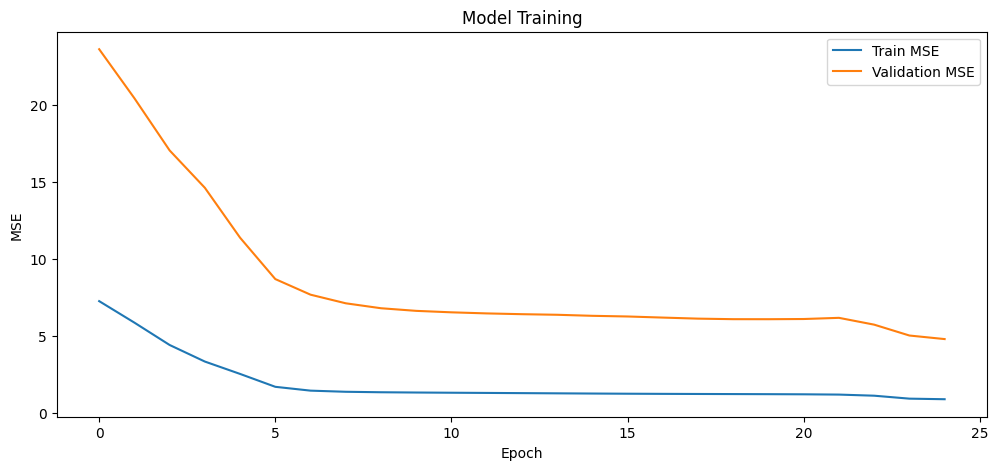

In [34]:
from matplotlib import pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Model Training')
plt.legend()
plt.show()

In [35]:
# Predict the ratings for the test set and check the rating compared to the y_test_cat
predictions = model.predict(test_X)
# Compare the predictions with the actual ratings
predictions = np.round(predictions).astype(int)

# Calculate the mean squared error
mse = np.mean((predictions.flatten() - test_Y.to_numpy().flatten())**2)
print(f"Mean Squared Error: {mse:.2f}")

correct_predictions = np.sum(predictions.flatten() == test_Y.to_numpy().flatten())
total_predictions = len(predictions)
accuracy = correct_predictions / total_predictions
print(f"Model Accuracy: {accuracy:.2f}")


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Squared Error: 2.67
Model Accuracy: 0.13


In [36]:
# Show the predictions which were incorrect by more than 2
incorrect_predictions = np.abs(predictions.flatten() - test_Y.to_numpy().flatten()) > 1
incorrect_reviews = test_df[incorrect_predictions]
print("Incorrect Predictions:")
for i, row in incorrect_reviews.iterrows():
    print(f"Title: {row['title']}")
    print(f"Text: {row['text']}")
    print(f"Predicted Rating: {predictions[i][0]}")
    print(f"Actual Rating: {row['ratings.overall']}")
    print("-" * 50)

# Print the number of incorrect predictions compared to the total number of predictions
num_incorrect = len(incorrect_reviews)
num_total = len(test_df)
print(f"Total Predictions: {num_total}")
print(f"Number of Correct Predictions: {num_total - num_incorrect}")
print(f"Number of Incorrect Predictions: {num_incorrect}")
# Print the accuracy based on the number of correct predictions
accuracy = (num_total - num_incorrect) / num_total
print(f"Accuracy: {accuracy:.2f}")

Incorrect Predictions:
Title: “I was SO surprised! I WILL return!”
Text: My husband and I just celebrated our 25th wedding anniversary. We normally stay at very high class hotels but that night we wanted to try something new without spending a fortune. (St. Regis, Ritz, etc are our norms) We wanted the Tribeca area so we pulled up to the hotel (unassuming front) The Bell guys were so nice and took care of our bags right away. While checking in we had at least 3 people come up to us and say Happy Anniversary. Being Starwood platinum, we had it all set up to hopefully get an upgrade. We gave 12,000 points which was the minimum. They told us we could not have a suite and we were a little disappointed but it would be fine because he was giving us a great view. Then the manager came in and changed everything and gave us the nicest suite ever! They gave us the top floor. They brought champagne and chocolate strawberries quickly to our room. It was the best ever!! The room was simple but beau

### 4. Experiment with VADER sentiment lexicon

In [37]:
# Load libraries
import numpy as np
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

balanced_train_df2 = balanced_train_df.copy()
# Create text data from text and title
text_data = balanced_train_df2["text"].to_numpy()

# Create target vector
y = train_Y.apply(lambda x: "positive" if x > 3 else ("negative" if x < 3 else "neutral")).tolist()

# Analyse with VADER
analyser = SentimentIntensityAnalyzer()
correct_predictions = 0

for text in text_data:
    score = analyser.polarity_scores(text)
    sentiment = "neutral"
    # If the compound score is greater than 0.05, it is positive
    # If the compound score is less than -0.05, it is negative
    # If the compound score is between -0.05 and 0.05, it is neutral
    if score['compound'] > 0.05:
        sentiment = "positive"
    elif score['compound'] < -0.05:
        sentiment = "negative"
    
    # Compare the predicted sentiment with the actual sentiment
    index = text_data.tolist().index(text)
    if sentiment == y[index]:
        correct_predictions += 1
        # Add the score to the balanced_train_df in a new column
        if index < len(balanced_train_df2):  # Ensure we are updating the correct row
            balanced_train_df2.loc[balanced_train_df2["text"] == text, "VADER_Sentiment"] = sentiment
    else:
        # Add the score based on the y value for sentiment
        if y[index] == "positive":
            if index < len(balanced_train_df2):
                balanced_train_df2.loc[balanced_train_df2["text"] == text, "VADER_Sentiment"] = "positive"
        elif y[index] == "negative":
            if index < len(balanced_train_df2):
                balanced_train_df2.loc[balanced_train_df2["text"] == text, "VADER_Sentiment"] = "negative"
        else:
            if index < len(balanced_train_df2):
                balanced_train_df2.loc[balanced_train_df2["text"] == text, "VADER_Sentiment"] = "neutral"

# Print the number of correct predictions
print(f"Correct Predictions: {correct_predictions}")
# Print the accuracy
accuracy = correct_predictions / len(text_data)
print(f"Accuracy: {accuracy * 100:.2f}%")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/dev/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Correct Predictions: 22330
Accuracy: 58.39%


In [38]:
train_X = pad_sequences(tokenizer.texts_to_sequences(balanced_train_df2['text']), maxlen=maxlen)
# Create a training set with the vader sentiment represented as -1 if neutral, 0 if negative and 1 if positive
train_X = np.concatenate((train_X, np.array(balanced_train_df2["VADER_Sentiment"].apply(lambda x: 1 if x == "positive" else (-1 if x == "negative" else 0)).tolist()).reshape(-1, 1)), axis=1)
print(train_X)

# Train the model
history = model.fit(
    train_X,
    train_Y,
    epochs=25,
    batch_size=256,
    validation_split=0.2,
)


[[    0     0     0 ...  4002 27240     1]
 [    0     0     0 ...   421    33     1]
 [    0     0     0 ...     5  1225     1]
 ...
 [    0     0     0 ...   186    65     1]
 [   77    30     4 ...   149   355     1]
 [    0     0     0 ...   652    51     1]]
Epoch 1/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.9340 - val_loss: 5.2023
Epoch 2/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.9026 - val_loss: 4.7036
Epoch 3/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.8678 - val_loss: 4.3633
Epoch 4/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8489 - val_loss: 4.4070
Epoch 5/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8356 - val_loss: 4.2843
Epoch 6/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8298 - val_loss: 4.2149
Epoch 7/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8049 - val_loss: 5.0256
Epoch 8/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.8908 - val_loss: 4.0384
Epoch 9/25
120/120 ━━━━━━━━━━━━━━━━━━━━ 

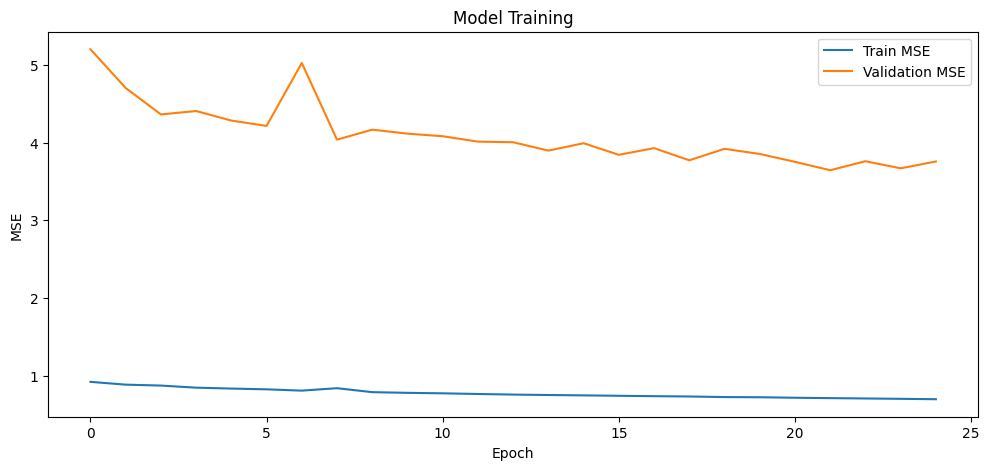

In [39]:
from matplotlib import pyplot as plt

# Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Train MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Model Training')
plt.legend()
plt.show()

In [45]:
# Predict the ratings for the test set and check the rating compared to the y_test_cat
predictions = model.predict(test_X)
# Compare the predictions with the actual ratings
predictions = np.round(predictions).astype(int)

# Calculate the mean squared error
mse = np.mean((predictions.flatten() - test_Y.to_numpy().flatten())**2)
print(f"Mean Squared Error: {mse:.2f}")

correct_predictions = np.sum(predictions.flatten() == test_Y.to_numpy().flatten())
total_predictions = len(predictions)
accuracy = correct_predictions / total_predictions
print(f"Model Accuracy: {accuracy:.2f}")


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Mean Squared Error: 1.46
Model Accuracy: 0.29


In [41]:
# Show the predictions which were incorrect by more than 2
incorrect_predictions = np.abs(predictions.flatten() - test_Y.to_numpy().flatten()) > 1
incorrect_reviews = test_df[incorrect_predictions]
print("Incorrect Predictions:")
for i, row in incorrect_reviews.iterrows():
    print(f"Title: {row['title']}")
    print(f"Text: {row['text']}")
    print(f"Predicted Rating: {predictions[i][0]}")
    print(f"Actual Rating: {row['ratings.overall']}")
    print("-" * 50)

# Print the number of incorrect predictions compared to the total number of predictions
num_incorrect = len(incorrect_reviews)
num_total = len(test_df)
print(f"Total Predictions: {num_total}")
print(f"Number of Correct Predictions: {num_total - num_incorrect}")
print(f"Number of Incorrect Predictions: {num_incorrect}")
# Print the accuracy based on the number of correct predictions
accuracy = (num_total - num_incorrect) / num_total
print(f"Accuracy: {accuracy:.2f}")

Incorrect Predictions:
Title: “I was SO surprised! I WILL return!”
Text: My husband and I just celebrated our 25th wedding anniversary. We normally stay at very high class hotels but that night we wanted to try something new without spending a fortune. (St. Regis, Ritz, etc are our norms) We wanted the Tribeca area so we pulled up to the hotel (unassuming front) The Bell guys were so nice and took care of our bags right away. While checking in we had at least 3 people come up to us and say Happy Anniversary. Being Starwood platinum, we had it all set up to hopefully get an upgrade. We gave 12,000 points which was the minimum. They told us we could not have a suite and we were a little disappointed but it would be fine because he was giving us a great view. Then the manager came in and changed everything and gave us the nicest suite ever! They gave us the top floor. They brought champagne and chocolate strawberries quickly to our room. It was the best ever!! The room was simple but beau

### 5. Final testing on test set and discussion of results

### 6. Propose a method to predict aspects 

***(COMP SCI 7417 and COMP SCI 7717 only)***

### 7. Reflection on the ***Product*** development.

### 9. References

https://pandas.pydata.org/pandas-docs/version/1.2.0/reference/api/pandas.json_normalize.html

https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/

https://pawarbi.github.io/blog/pandas/numpy/data-cleaning/2021/03/05/removing-non-alphanumeric-symbols-characters-from-column-numpy-pandas-dataframe.html


### Appendix